Destek Vektör Makineleri (Support Vector Machine), doğrusal veya doğrusal olmayan sınıflandırma, regresyon ve hatta aykırı değer tespiti yapabilen çok güçlü ve çok yönlü bir yapay öğrenme modelidir. Bu derste, destek vektör makinesi algoritmasını ve scikit-learn'deki uygulamasını öğreneceğiz.

Destek vektör makinesi (DVM), her yapay öğrenme uzmanının bilgi dağarcığında olması gereken bir algoritmadır. DVM, daha az hesaplama gücü kullanarak önemli bir doğruluk ürettiği için birçok kişi tarafından  tercih edilir. DVM, hem regresyon hem de sınıflandırma uygulamaları için kullanılabilir. Ancak, sınıflandırma uygulamalarında daha yaygın olarak kullanılmaktadır.

DVM algoritmasının amacı, veri noktalarını belirgin bir şekilde sınıflandıran N boyutlu bir uzayda (N: öznitelik sayısı) bir hiperdüzlem bulmaktır.
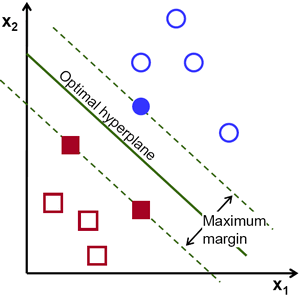
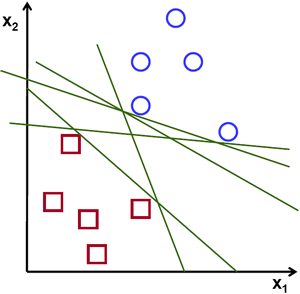

İki veri noktasının sınıfını belirleyebilmek için seçilebilecek birçok olası hiperdüzlem vardır. Amacımız, maksimum marjine sahip, yani her iki sınıfın veri noktaları arasındaki maksimum mesafeye sahip bir düzlem bulmaktır. Marjin mesafesini en üst düzeye çıkarmak, gelecekteki veri noktalarının daha güvenle sınıflandırılabilmesi için bir miktar destek sağlar.





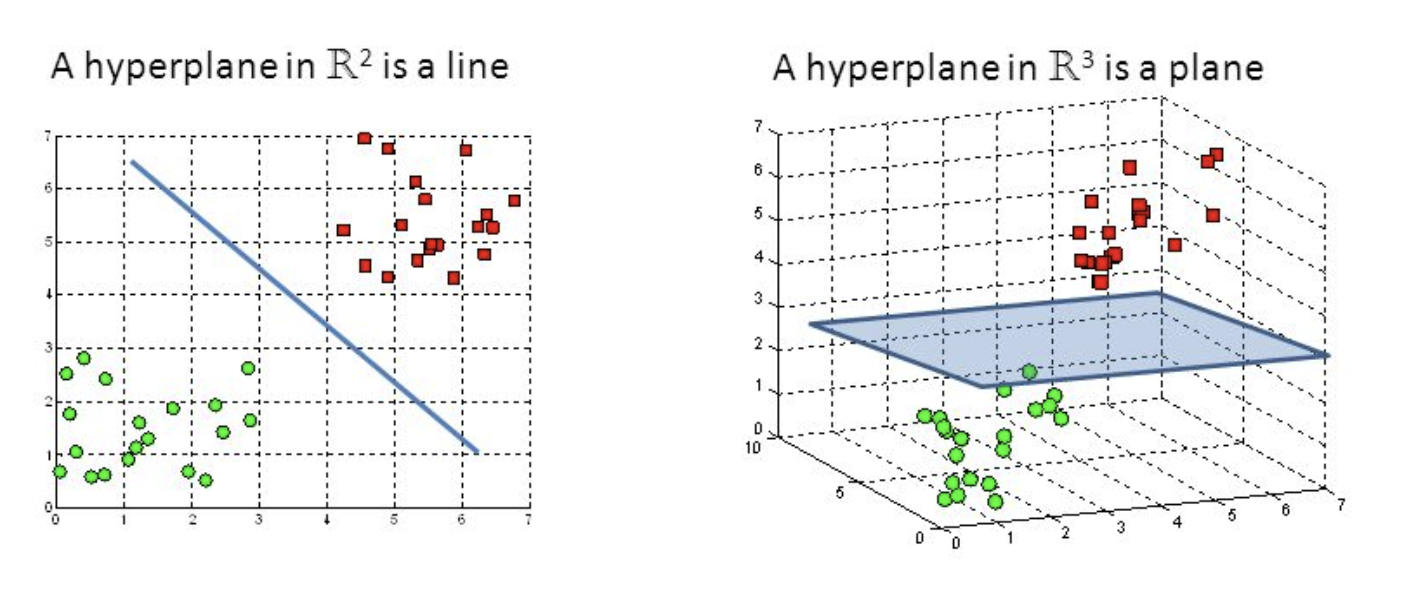

Hiper düzlemler, veri noktalarını sınıflandırmaya yardımcı olan karar sınırlarıdır. Hiper düzlemin her iki tarafına düşen veri noktaları farklı sınıflara atfedilebilir. Ayrıca, hiper düzlemin boyutu, özniteliklerinin sayısına bağlıdır. Girdi özniteliklerinin sayısı 2 ise, hiperdüzlem sadece bir çizgidir. Girdi özniteliklerinin sayısı 3 ise, hiperdüzlem iki boyutlu bir düzlem olur. Öznitelik sayısı 3'ü geçtiğinde , hiper düzlemin şeklini hayal etmek zorlaşır.

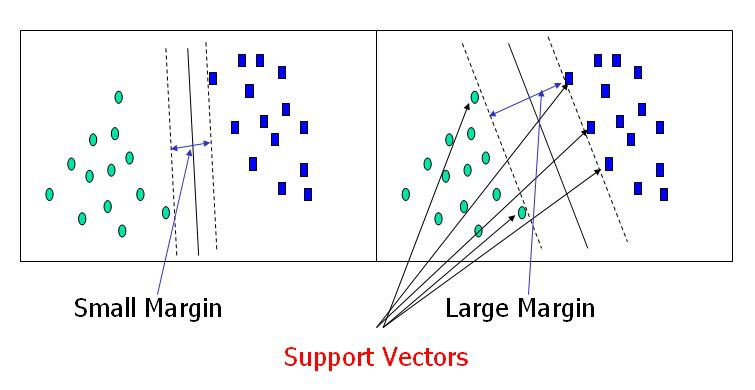

Destek vektörleri, hiper düzleme daha yakın olan ve hiper düzlemin konumunu ve yönünü etkileyen veri noktalarıdır. Bu destek vektörlerini kullanarak sınıflandırıcının marjını maksimum seviyede tutarız. Destek vektörlerinin silinmesi, hiper düzlemin konumunu değiştirecektir. Bunlar, DVM'mizi oluşturmamıza yardımcı olan noktalardır.

İş tanımı ve alınan ücretlerden oluşan bir veri seti üzerinde (Position_Salaries.csv) hızlı bir şekilde DVM Regresyonu çalışması yapalım. 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Yukarıdaki tablonun, bir şirketin İK ekibinin yeni bir çalışana hangi maaşı teklif edeceğini belirlemek için kullandığı tablo olduğunu varsayalım. Projemiz için Bölge Müdürü pozisyonu için başvuran ve 2 yıldır Bölge Müdürü olarak çalışan bir çalışandan örnek verelim. Yani yukarıdaki tabloya göre — 6. seviye ile 7. seviye arasına düşüyor — Diyelim ki seviye 6.5'in altına düşüyor

In [4]:
df.shape

(10, 3)

Veri kümesine bakarsak, Seviye 6.5'in altına düşen bir çalışanın maaşını tahmin etmemiz gerekir - Yani gerçekten ilk sütun olan “Pozisyon”a ihtiyacımız yok.

Burada X, “Seviye” olan bağımsız değişkendir.
ve y, “Maaş” olan bağımlı değişkendir.

In [5]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:].values

DVM algoritması özellik ölçekleme uygulamaz. Bu yüzden, özellik ölçekleme uygulamamız gerekiyor.

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Modelin eğitimi için Sklearn.svm kütüphanesindeki SVR sınıfını kullanacağız.
Önce SVR sınıfının bir nesnesini oluşturuyoruz ve kernel parametresini “rbf” (Radial Basis Function) olarak tanımlıyoruz ve ardından X ve y'yi girdi olarak kullanarak fit yöntemini çağırıyoruz.

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

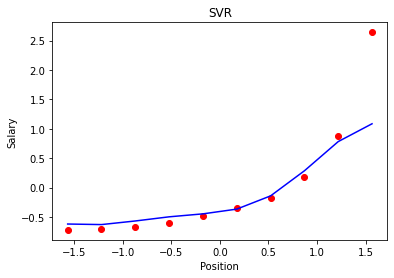

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X, y , color="red")
plt.plot(X, regressor.predict(X), color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

Bir çalışanın maaşını 6.5 seviyesinde tahmin etmek istiyoruz. Şimdi, X ve y'ye özellik ölçeklendirmeyi uyguladığımıza göre, önce 6.5 değerini dönüştürmek için özellik ölçekleme yapmamız gerekecek.

Son olarak, tahmin edilen değer zaten ölçeklenmiş olduğundan, gerçek değeri elde etmek için ters dönüşüm yapmak zorundayız.
Bu adımlar aşağıda özetlenmiştir.

In [9]:
# 6.5 değerini özellik ölçeklemeye uyguluyoruz

sc_X_val = sc_X.transform(np.array([[6.5]]))

# Değerin kestirimini yapıyoruz.

scaled_y_pred = regressor.predict(sc_X_val)

# Kestirilen değer ölçeklenmiş olduğu için, ölçeklenmemiş değere geri dönmemiz gerekir. Bunun için ters dönüşüm uygulayalım. 

y_pred = sc_y.inverse_transform(scaled_y_pred) 
print('6.5 seviyesi için kestirilen maaş:  ',y_pred)

6.5 seviyesi için kestirilen maaş:   [170370.0204065]


### Hiperparametrelerin Optimizasyonu

Yapay öğrenme algoritmalarının çoğu, **hiperparametre** adı verilen ayarlanabilen bazı parametrelere sahiptir. Modelleri eğitmeden önce en yüksek doğruluklu kestirimi sağlayacak hiperparametreleri belirlememiz gerekiyor. Hiperparametreler, sağlam ve doğru modeller oluşturmada çok önemlidir. Kaba hata ve varyans arasındaki dengeyi bulmamıza yardımcı olurlar ve böylece modelin gereğinden fazla veya eksik öğrenmesini önlerler. Hiperparametreleri ayarlayabilmek için ne anlama geldiklerini ve bir modeli nasıl değiştirdiklerini anlamamız gerekir. 

DVM, iki veya daha fazla sınıf arasında ayrım yapan bir karar sınırı oluşturur. Karar sınırının nasıl çizileceği veya belirleneceği, DVM algoritmalarında en kritik kısımdır. Farklı sınıflardaki veri noktaları doğrusal olarak ayrılabilir olduğunda, bir karar sınırı çizmek kolay bir iştir.

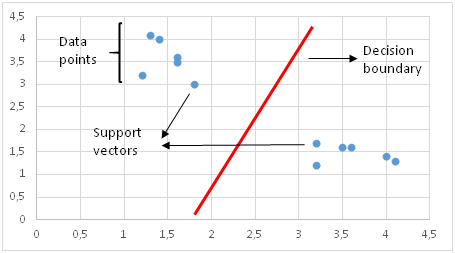

Ancak, gerçek veriler gürültü içerir ve çoğu durumda doğrusal olarak ayrılamaz. Standart bir DVM, tüm olumlu ve olumsuz örnekleri (yani iki farklı sınıfı) ayırmaya çalışır ve hiçbir noktanın yanlış sınıflandırılmasına izin vermez. Bu, fazla öğrenme ile sonuçlanır veya bazı durumlarda standart bir DVM ile bir karar sınırı bulunamaz.

Aşağıdaki 2 boyutlu uzaydaki veri noktalarını inceleyelim:

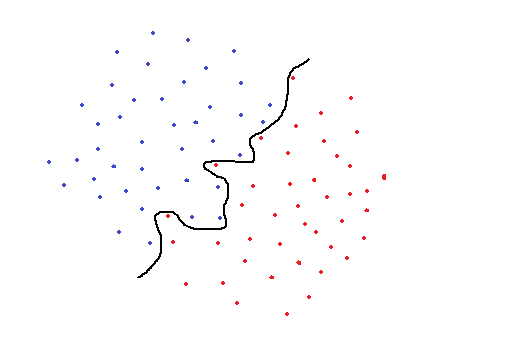

Standart bir DVM, siyah eğri çizgisini bir karar sınırı olarak kullanarak mavi ve kırmızı sınıfları ayırmaya çalışır. Bununla birlikte, bu çok detaylı bir sınıflandırmadır ve aşırı öğrenme olma olasılığı yüksektir. Aşırı öğrenmiş bir DVM, eğitim seti ile yüksek bir doğruluk elde eder, ancak daha önce görülmemiş yeni örneklerde iyi performans göstermez. Bu model gürültüye karşı çok hassas olacaktır ve veri noktası değerlerindeki çok küçük değişiklikler bile sınıflandırma sonuçlarını değiştirebilir. Bu siyah çizgiyi bir karar sınırı olarak kullanan DVM, bu veri kümesini iyi bir şekilde genelleştirilmemiştir.

Bu sorunun üstesinden gelmek için 1995 yılında Cortes ve Vapnik, bazı örneklerin yanlış sınıflandırılmasına veya karar sınırının yanlış tarafında olmasına izin veren “yumuşak marj” DVM fikrini ortaya attı. Yumuşak marjlı DVM genellikle daha iyi genelleştirilmiş bir modelle sonuçlanır. Örneğimizde, yumuşak kenarlı SVM için karar sınırı aşağıdaki gibi siyah düz çizgi gibi görünebilir:

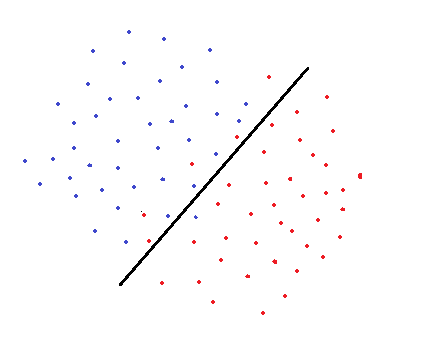

Bazı yanlış sınıflandırılmış noktalar görüyoruz ama sonuçta daha genelleştirilmiş bir modelimiz var. Karar sınırını belirlerken, bir yumuşak marjlı DVM, aşağıdaki hedeflerle bir optimizasyon problemini çözmeye çalışır:



*   Karar sınırının sınıflara (veya destek vektörlerine) olan mesafesini artırır
*   Eğitim setinde doğru şekilde sınıflandırılan örneklerin sayısını en üst düzeye çıkarır

Bu iki hedef sınıf arasında açıkça bir örnek alışverişi vardır. Eğitim setindeki tüm veri noktalarını doğru bir şekilde etiketlemek için karar sınırının belirli bir sınıfa çok yakın olması gerekebilir. Ancak bu durumda, karar sınırı gürültüye ve bağımsız değişkenlerdeki küçük değişikliklere karşı çok hassas olduğu için test veri setindeki doğruluk daha düşük olabilir. Öte yandan, bazı yanlış sınıflandırılmış örnekler olmasına rağmen, her sınıfa mümkün olduğunca bir karar sınırı yerleştirilebilir. Bu alışveriş, **C parametresi** tarafından kontrol edilir.

C parametresi, yanlış sınıflandırılan her veri noktası için bir ceza (penaltı) ekler. C küçükse, yanlış sınıflandırılan örnekler için ceza düşüktür, bu nedenle daha fazla sayıda yanlış sınıflandırmaya izin verebilen büyük marjlı bir karar sınırı seçilir. C büyükse, DVM daha küçük bir marj uygular ve yüksek ceza puanı nedeniyle yanlış sınıflandırılan örneklerin sayısını en aza indirmeye çalışır. Yanlış sınıflandırılan tüm örnekler için ceza aynı değildir. Karar sınırına olan uzaklık ile doğru orantılıdır.

Bazı durumlarda, doğrusal olarak ayrılamayan veri noktalarının, doğrusal olarak ayrılabilmeleri için **çekirdek (kernel) fonksiyonları** kullanılarak dönüşüm yapılır. Çekirdek fonksiyonu bir tür benzerlik ölçüsüdür. Girdiler orijinal özelliklerdir ve çıktılar yeni özellik uzayında bir benzerlik ölçüsüdür. Buradaki benzerlik, bir derece yakınlık anlamına gelir. Veri noktalarını gerçekten yüksek boyutlu bir özellik uzayına dönüştürmek maliyetli bir işlemdir. Algoritma aslında veri noktalarını yeni, yüksek boyutlu bir özellik uzayına dönüştürmez. Çekirdekleştirilmiş DVM, gerçekte bir dönüşüm yapmadan, yüksek boyutlu bir özellik uzayında benzerlik ölçüleri açısından karar sınırlarını hesaplar. Buna da **çekirdek hilesi** ismi verilmiştir. 

Çekirdek fonksiyonu olarak lineer, polinom veya sigmoid fonksiyonları kullanılabilir.Ancak, en yaygın olarak kullanılan çekirdek fonksiyonlarından biri radyal tabanlı fonksiyondur (Radial Basis Function - RBF).

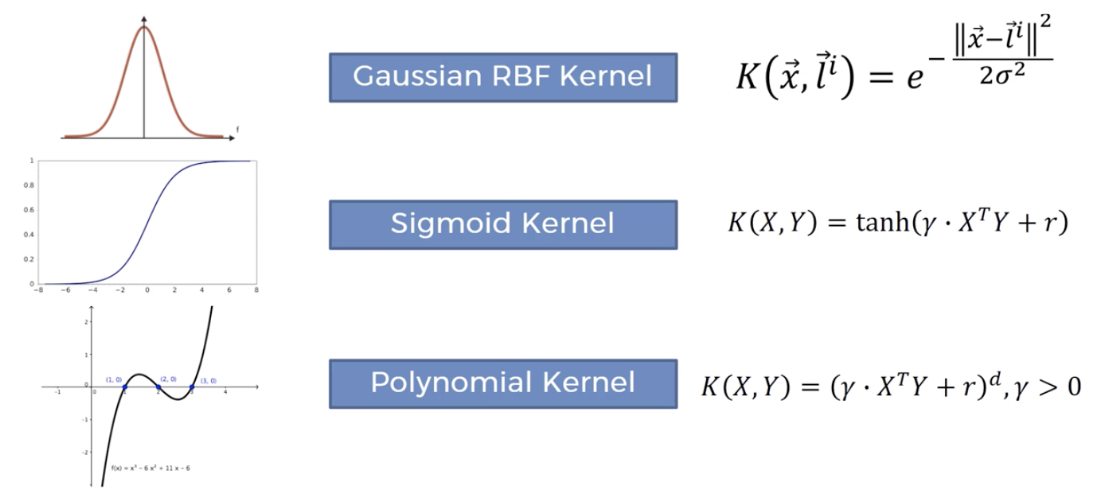

 RBF'nin **gamma parametresi**, tek bir eğitim noktasının etki mesafesini kontrol eder. Düşük gamma değerleri, daha fazla noktanın birlikte gruplandırılmasıyla sonuçlanan büyük bir benzerlik yarıçapını gösterir. Yüksek gamma değerleri ise, aynı grupta (veya sınıfta) sayılabilmesi için noktaların birbirine çok yakın olmasını sağlar. Bu nedenle, çok büyük gama değerlerine sahip modeller fazla öğrenme eğilimindedir. Aşağıdaki görselleştirmeler kavramı daha iyi açıklamaktadır:

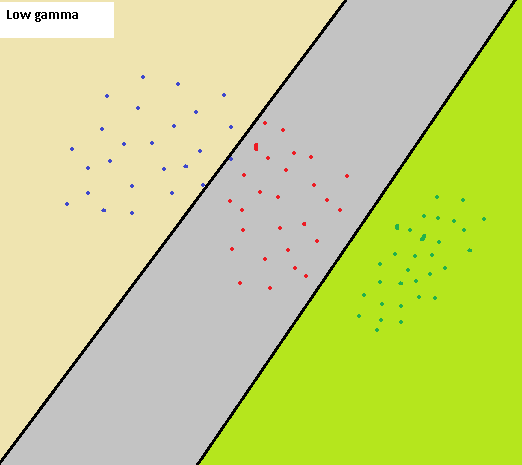


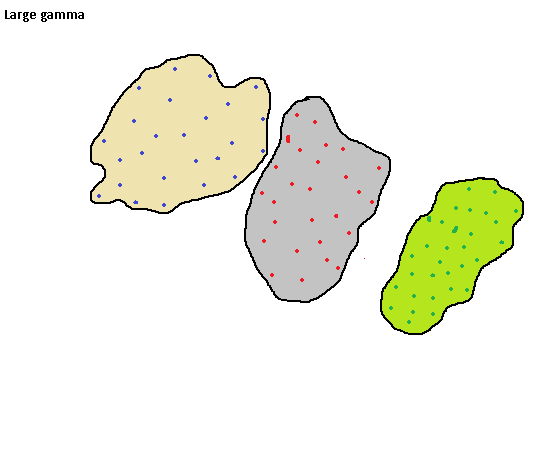


İlk görsel, düşük gamma değerlerine sahip durumu temsil etmektedir. Benzerlik yarıçapı büyüktür, bu nedenle renkli bölgelerdeki tüm noktalar aynı sınıfta kabul edilir. Örneğin sağ alt köşede bir noktamız varsa “yeşil” sınıf olarak sınıflandırılır. Öte yandan, ikinci görüntü büyük gamma durumudur. Aynı sınıfta gruplanacak veri noktaları için daha sıkı sınırlı alana düşmeleri gerekir. Bu nedenle, küçük bir gürültü, bir veri noktasının bir sınıftan düşmesine neden olabilir. Büyük gamma değerlerinin aşırı uyumla sonuçlanması muhtemeldir.

Gamma azaldıkça, farklı sınıfları ayıran bölgeler daha genelleşir. Çok büyük gamma değerleri, çok spesifik sınıf bölgelerine (fazla öğrenmeye) neden olur.

Lineer fonksiyonu çekirdek olarak kullanacaksak, sadece C parametresini optimize etmemiz gerekir. Ancak, bir RBF çekirdeği kullanmak istiyorsak, hem C hem de gamma parametresinin aynı anda optimize edilmesi gerekir. Gamma büyükse, C'nin etkisi ihmal edilebilir hale gelir. Gamma küçükse, C parametresi modeli tıpkı doğrusal bir modeli etkilediği gibi etkiler. C ve gamma için tipik değerler aşağıdaki gibidir. Ancak, uygulamaya bağlı olarak belirli optimal değerler mevcut olabilir:

0.0001 < gamma < 10


0.1 < C < 100

Scikit-learn kütüphanesinde DVM ile sınıflandırma yapmamızı sağlayan [SVC fonksiyonunu](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) inceleyelim. Görüleceği üzere bu fonksiyon, çok farklı hiperparametre girdisi kullanabilmektedir. Fonksiyonun sahip olduğu sabit hiperparametre değerlerini (default), kendi optimizasyon değerlerimiz ile değiştirme imkanına sahibiz. 

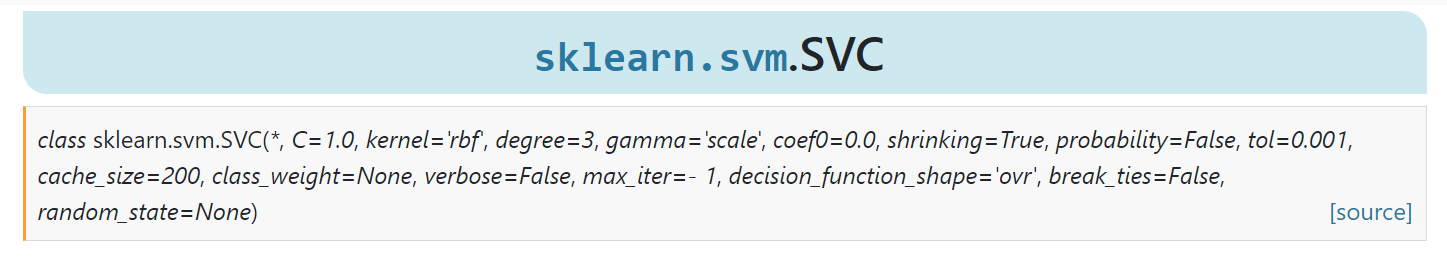

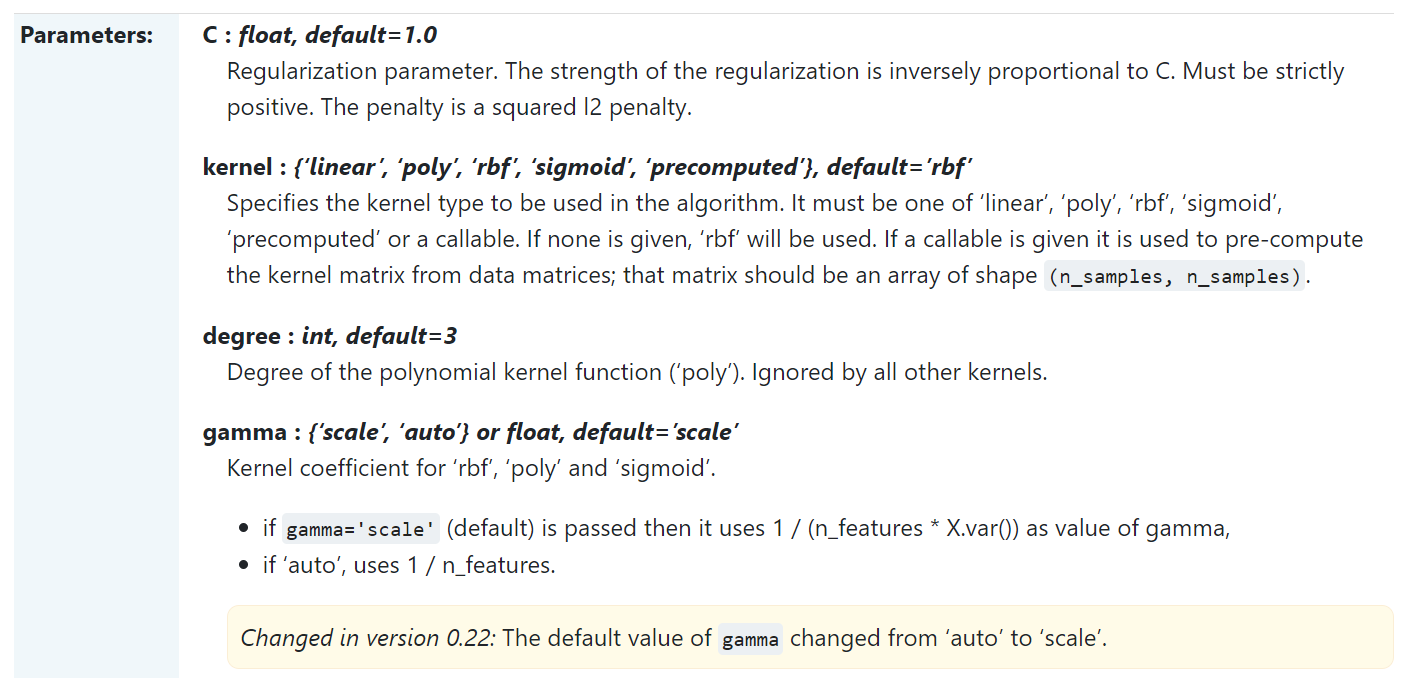

Peki veri setimiz için en uygun hiperparametrelerin seçimini kendimiz mi belirleyeceğiz? Yoksa deneme yanılma yöntemi mi uygulamalıyız?

Veri setimizin genişliği, veri örneklerinin arasındaki ilişki vb. nitelikler, hiperparametrelerin seçimini doğrudan etkileyeceği için hiperparametrelerin optimizasyonunda deneme yanılma yöntemini kullanmak daha akılcı olacaktır. Ancak her bir hiperparametreyi tek tek denemek uygun değildir. Bunun yerine, farklı hiperparametrelerin kombinasyonlarından oluşan bir sözlük oluşturarak en iyi performansı veren kombinasyonu araştırmak gerekir. Bunun için Scikit-learn kütüphanesinde **GridSearchCV** modülü bulunmaktadır. Bir sınıflandırma problemi ile örneklendirelim:

GridSearchCV, eğitim için bir model üzerinde denenebilecek hiperparametreleri tanımlayan bir sözlüğü girdi olarak kabul eder. 

Scikit-Learn'ün içine gömülü bulunan meme kanseri veri setini kullanacağız.

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
 
cancer = load_breast_cancer()
 
# Veri seti bir sözlük formatında geldiği için anahtarlarını inceleyelim.
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Şimdi tüm özellikleri yeni veri çerçevesine ve hedef özelliklerimizi ayrı veri çerçevelerine çıkaracağız.

In [11]:
df_feat = pd.DataFrame(cancer['data'],
                       columns = cancer['feature_names'])
 

df_target = pd.DataFrame(cancer['target'],
                     columns =['Cancer'])
 
print("Öznitelikler: ")
print(df_feat.info())

Öznitelikler: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [12]:
print("Öznitelikleri içeren Veri çerçevemizi görelim : ")
df_feat.head()

Öznitelikleri içeren Veri çerçevemizi görelim : 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#Hedef sınıfları içeren veri setini ekrana verelim.
df_target.tail()

,Cancer
564,0
565,0
566,0
567,0
568,1


In [14]:
# Veri setinin %20'sini test, %80'ini eğitim için ayıralım. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target),test_size = 0.20)

In [15]:
#Hiperparametrelerin optimizasyonunu yapmadan, Scikit-learn'ün default değerleri ile kestirim yapalım.
model = SVC()
model.fit(X_train, y_train)
 
# Kestirim sonuçlarını ekrana verelim.

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81        43
           1       0.84      0.99      0.91        71

    accuracy                           0.88       114
   macro avg       0.91      0.84      0.86       114
weighted avg       0.89      0.88      0.87       114

[[30 13]
 [ 1 70]]


In [16]:
#Simdi GridSearchCV kullanarak en iyi hiperparametre optimizasyonunu sağlayan kombinasyonu araştıralım: 
from sklearn.model_selection import GridSearchCV
 
# Farklı hiperparametre değerlerini içeren sözlüğümüzü yazalım:

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True)
 
# Kombinasyonları tek tek eğitelim: 

grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
# Optimizasyondaki en iyi hiperparametre kombinasyonunu ekrana verelim.
print(grid.best_params_)


# En iyi sonucu veren hiperparametre kombinasyonunun doğruluğunu ekrana verelim.
print(grid.best_score_)


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.934065934065934


In [18]:
# En iyi kombinasyonu bulan 'grid' adındaki sınıflayıcımızı test verisi üzerinde çalıştıralım:

grid_predictions = grid.predict(X_test)
 
# Sınıflandırma raporunu ekrana verelim: 
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

[[37  6]
 [ 1 70]]
